In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [2]:
# the supplied CSV data file is the raw_data directory
bc_data = pd.read_csv('/Users/angelique/Documents/GitHub/Capstone-2---Breast-Cancer-Tumor-Predictions/data.csv')

bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df = bc_data.drop(columns=['id', 'Unnamed: 32'])

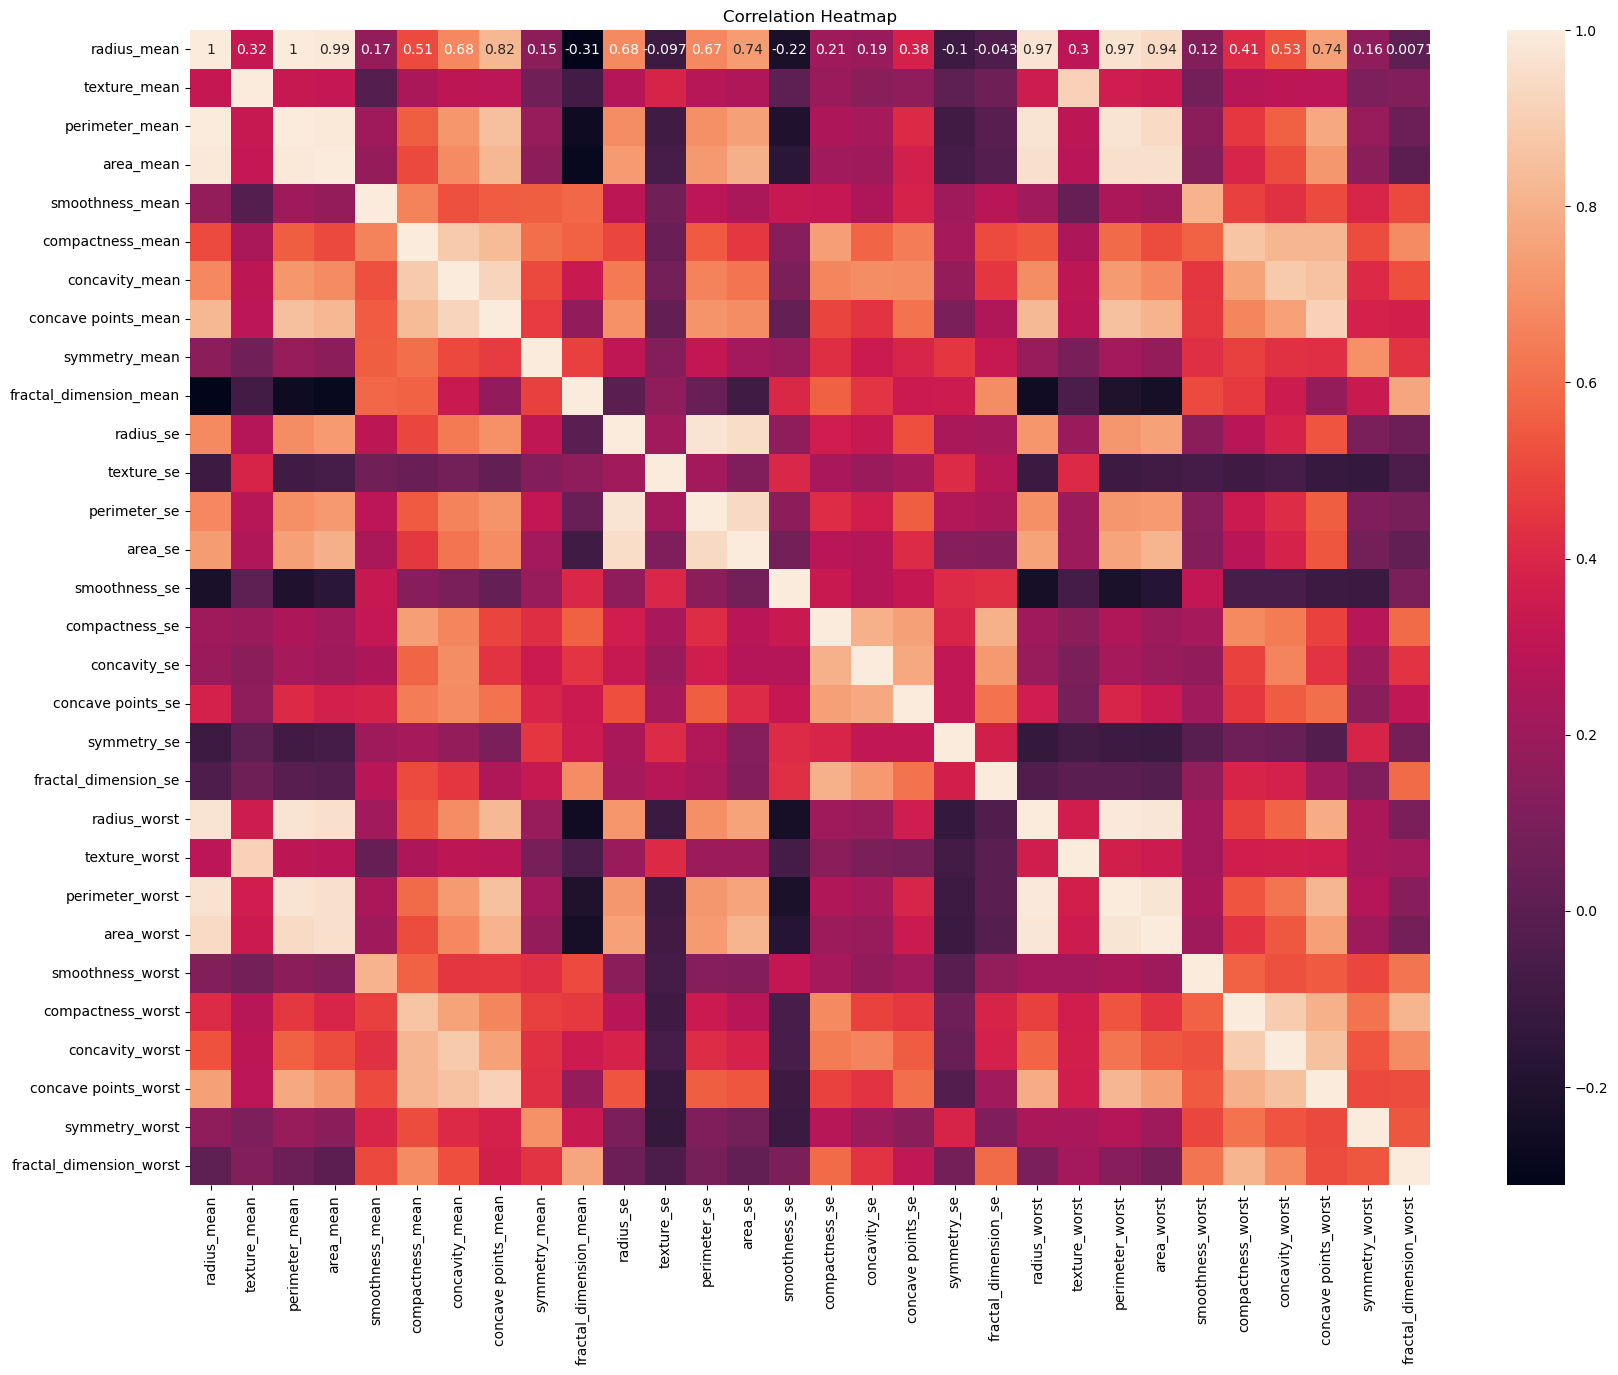

In [7]:
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlations
corr = numerical_df.corr()  # Exclude non-numerical columns
plt.figure(figsize=(20, 15))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

Show a table as a more readable version of the correlation values

In [10]:
corr = numerical_df.corr()

# Convert correlation matrix to a readable format
corr_pairs = corr.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])
corr = corr_pairs.sort_values(by='Correlation', ascending=False)
corr

,Feature 1,Feature 2,Correlation
2,radius_mean,perimeter_mean,0.997855
622,radius_worst,perimeter_worst,0.993708
3,radius_mean,area_mean,0.987357
63,perimeter_mean,area_mean,0.986507
623,radius_worst,area_worst,0.984015
...,...,...,...
293,fractal_dimension_mean,area_worst,-0.231854
290,fractal_dimension_mean,radius_worst,-0.253691
69,perimeter_mean,fractal_dimension_mean,-0.261477
99,area_mean,fractal_dimension_mean,-0.283110


radius_mean and perimeter_mean (0.997855): These two features are almost perfectly correlated.

radius_worst and perimeter_worst (0.993708): Similarly, the "worst" versions of these features are strongly correlated.

radius_mean and area_mean (0.987357): Larger radii are strongly associated with larger areas.

There is also strong correlation between radius_worst and area_worst

There is also strong correlation between radius_se, area_se and perimeter_se

Since features like radius_mean, perimeter_mean and area_mean are almost identical, I am dropping one of them to avoid redundancy during model training.

In [9]:
x = bc_data.drop(columns=['diagnosis'])
y = bc_data['diagnosis']

In [ ]:
sns.hist(x=['diagnosis'], y=')
plt.title('Destribuation of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Counts')
plt.show()